In [1]:
from raspberry_listener.datatypes import Sensor, SensorData, SensorReading, SensorType
from raspberry_listener.remotereader import download_archive
import pandas as pd
import matplotlib.pyplot as plt
from dataclasses import dataclass

In [2]:
archive = download_archive()

In [3]:
sensor_combinations = {"humidity": ["DHT11"], "temperature": ["DHT11","PI_CPU", "DS18B20"]}

In [4]:
df = pd.read_parquet(archive)
df = SensorData.repair_dataframe(df)
print(df)

                                               reading unit
sensor_type sensor timestamp                               
temperature DHT11  2023-05-09 02:25:04.813177     23.0    C
                   2023-05-09 02:25:06.091469     23.0    C
                   2023-05-09 02:25:07.320726     23.0    C
                   2023-05-09 02:25:08.321924     23.0    C
                   2023-05-09 02:25:09.524034     23.0    C
...                                                ...  ...
humidity    DHT11  2023-05-25 13:33:49.762481     34.0    %
                   2023-05-25 13:33:50.763086     34.0    %
                   2023-05-25 13:33:51.778442     34.0    %
                   2023-05-25 13:33:52.779296     34.0    %
                   2023-05-25 13:33:53.794658     34.0    %

[3790155 rows x 2 columns]


In [42]:
def histogram_density(df: pd.DataFrame, sensor_type, sensor):
    def get_timeindexed_single_sensor(df: pd.DataFrame) -> tuple[pd.Series, str]:
        single_sensor_df = df.loc[sensor_type, sensor]
        return single_sensor_df["reading"], single_sensor_df["unit"][0]
    ser, unit = get_timeindexed_single_sensor(df)
    plt.figure()
    ser.hist(density=True, orientation="horizontal", label=sensor)
    plt.title(f"{sensor_type} - {sensor}")
    plt.ylabel(unit, rotation="horizontal", loc="top")
    plt.legend()
    

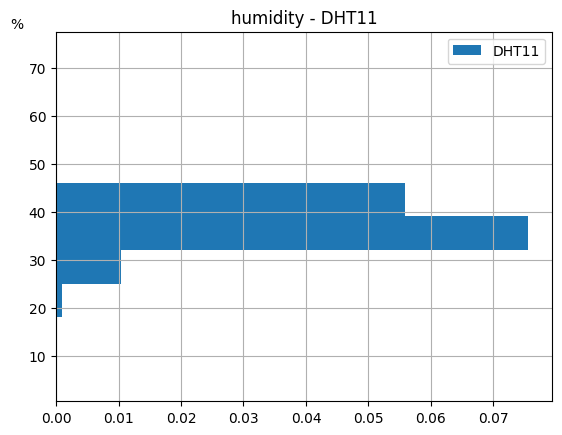

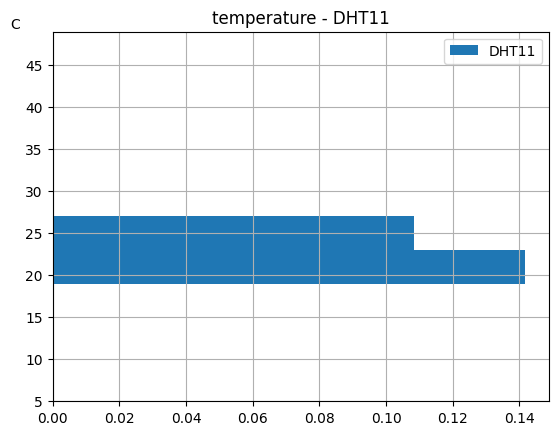

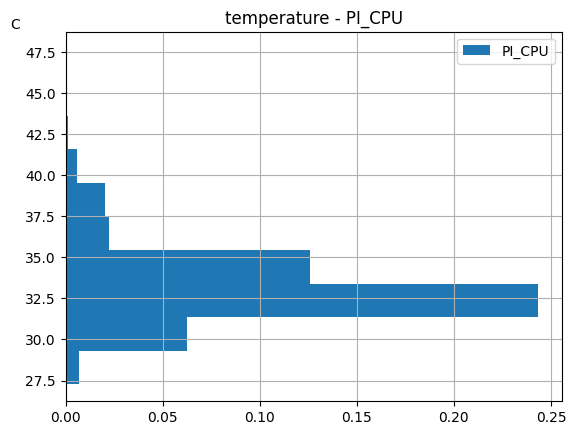

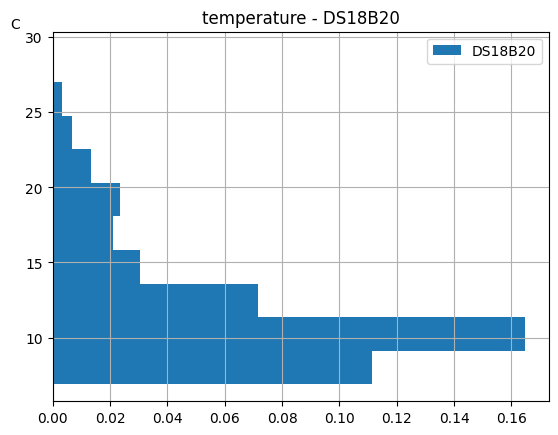

         198724 function calls (195596 primitive calls) in 0.154 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        4    0.013    0.003    0.013    0.003 {method 'take' of 'numpy.ndarray' objects}
        4    0.013    0.003    0.020    0.005 histograms.py:678(histogram)
 1228/960    0.005    0.000    0.028    0.000 {built-in method numpy.core._multiarray_umath.implement_array_function}
       12    0.005    0.000    0.005    0.000 _mixins.py:266(__getitem__)
1304/1300    0.004    0.000    0.004    0.000 {built-in method numpy.asarray}
      664    0.004    0.000    0.004    0.000 {method 'reduce' of 'numpy.ufunc' objects}
      924    0.003    0.000    0.013    0.000 artist.py:1180(_update_props)
        4    0.003    0.001    0.003    0.001 blocks.py:901(_slice)
8180/7156    0.003    0.000    0.004    0.000 artist.py:319(stale)
        4    0.002    0.001    0.002    0.001 {pandas._libs.lib.maybe_booleans_to_slice}
 

In [45]:
def plot_all():
    for sensor_type, sensors in sensor_combinations.items():
        for sensor in sensors:
            histogram_density(df, sensor_type, sensor)
%prun plot_all()


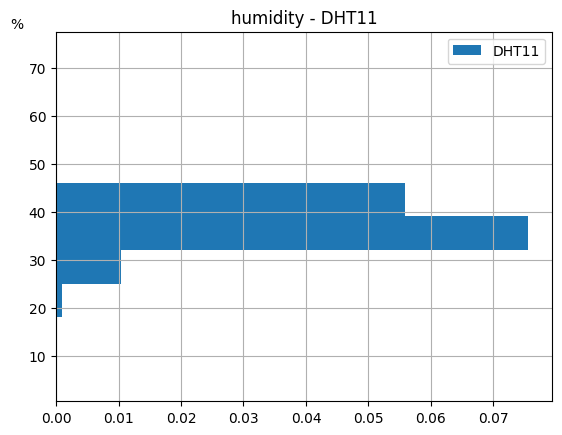

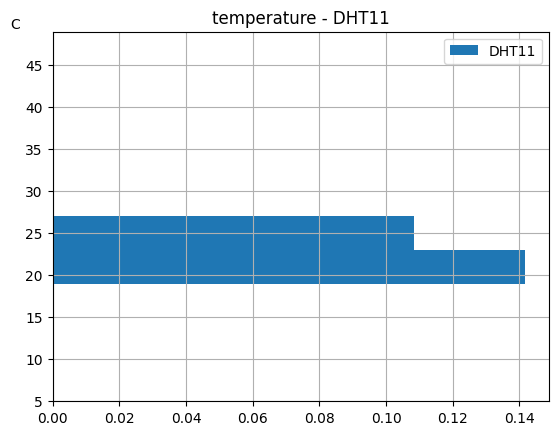

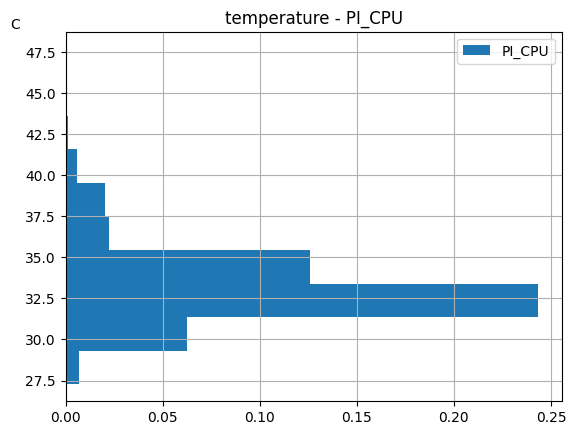

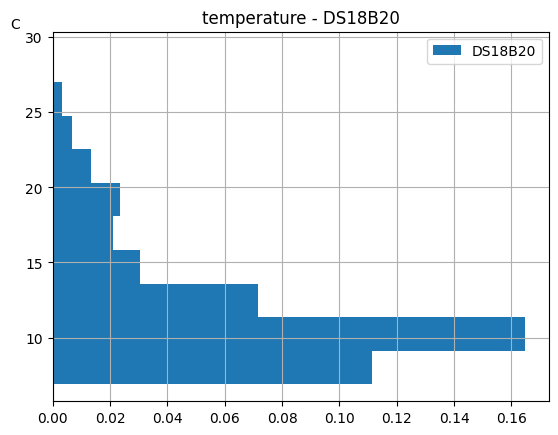

         198724 function calls (195596 primitive calls) in 0.154 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        4    0.013    0.003    0.013    0.003 {method 'take' of 'numpy.ndarray' objects}
        4    0.013    0.003    0.020    0.005 histograms.py:678(histogram)
 1228/960    0.005    0.000    0.028    0.000 {built-in method numpy.core._multiarray_umath.implement_array_function}
       12    0.005    0.000    0.005    0.000 _mixins.py:266(__getitem__)
1304/1300    0.004    0.000    0.004    0.000 {built-in method numpy.asarray}
      664    0.004    0.000    0.004    0.000 {method 'reduce' of 'numpy.ufunc' objects}
      924    0.003    0.000    0.013    0.000 artist.py:1180(_update_props)
        4    0.003    0.001    0.003    0.001 blocks.py:901(_slice)
8180/7156    0.003    0.000    0.004    0.000 artist.py:319(stale)
        4    0.002    0.001    0.002    0.001 {pandas._libs.lib.maybe_booleans_to_slice}
 

In [ ]:
def plot_all():
    for sensor_type, sensors in sensor_combinations.items():
        for sensor in sensors:
            histogram_density(df, sensor_type, sensor)
%prun plot_all()


sensor_type  sensor 
temperature  DHT11      Axes(0.125,0.11;0.775x0.77)
             PI_CPU     Axes(0.125,0.11;0.775x0.77)
             DS18B20    Axes(0.125,0.11;0.775x0.77)
humidity     DHT11      Axes(0.125,0.11;0.775x0.77)
             PI_CPU                             NaN
             DS18B20                            NaN
Name: reading, dtype: object

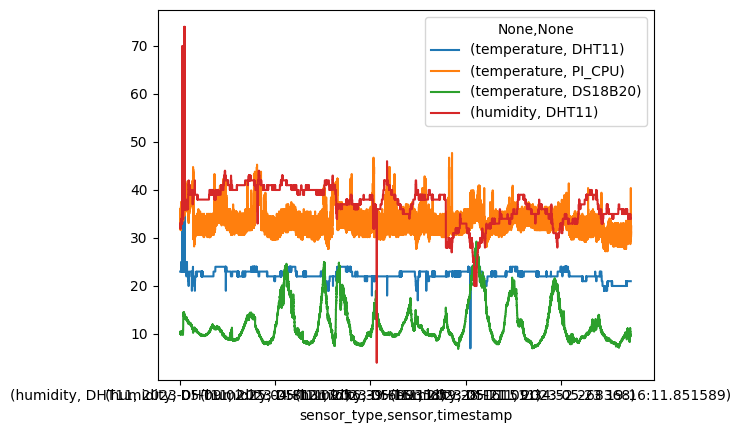

In [46]:

grouping = df.groupby(level=[0,1])
grouping['reading'].plot(legend=True)